# Exploración de Datos – Caso Airbnb

## Introduccion

En este notebook se realiza el análisis exploratorio de los datasets utilizados en el caso de negocio de Airbnb.
El objetivo es comprender la estructura de los datos y detectar aspectos relevantes que guíen la etapa de limpieza y transformación.

## 1. Carga y comprensión inicial de los datos

### 1.1 Carga de datasets

Se cargan los datasets originales desde la carpeta `data/raw`.
Estos archivos se utilizan como fuente de datos para el analisis exploratorio,
sin realizar modificaciones sobre los mismos.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_listings = pd.read_csv('../data/raw/listings.csv')
df_reviews = pd.read_csv('../data/raw/reviews.csv')
df_calendar = pd.read_csv('../data/raw/calendar.csv')

C:\Users\brian\AppData\Local\Temp\ipykernel_22788\2963554984.py:1: DtypeWarning: Columns (61,62,95) have mixed types. Specify dtype option on import or set low_memory=False.
  df_listings = pd.read_csv('../data/raw/listings.csv')


In [3]:
df_listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,11508,https://www.airbnb.com/rooms/11508,20200426042522,2020-04-26,Amazing Luxurious Apt-Palermo Soho,NaN,LUXURIOUS NEW APT: 1 BDRM- POOL/ GYM/ SPA/ 24-...,LUXURIOUS NEW APT: 1 BDRM- POOL/ GYM/ SPA/ 24-...,none,AREA: PALERMO SOHO Minutes walking distance fr...,...,f,f,strict_14_with_grace_period,f,f,1,1,0,0,0.27
1,12463,https://www.airbnb.com/rooms/12463,20200426042522,2020-04-26,Room in Recoleta - awesome location,My apartment is centrally located in Recoleta ...,This is a very comfortable pull-out sofa in th...,My apartment is centrally located in Recoleta ...,none,It's near the school of medicine so the street...,...,f,f,moderate,f,f,1,0,1,0,0.16
2,13095,https://www.airbnb.com/rooms/13095,20200426042522,2020-04-26,Standard Room at Palermo Viejo B&B,Palermo Viejo B&B is a typical home in one of ...,Standard room : Palermo Viejo Bed & Breakfast ...,Palermo Viejo B&B is a typical home in one of ...,none,NaN,...,f,f,strict_14_with_grace_period,f,f,7,0,7,0,0.06
3,13096,https://www.airbnb.com/rooms/13096,20200426042522,2020-04-26,Standard Room in Palermo Viejo B&B,Palermo Viejo B&B is a typical home in one of ...,Palermo Viejo Bed & Breakfast is located in a ...,Palermo Viejo B&B is a typical home in one of ...,none,NaN,...,f,f,strict_14_with_grace_period,f,f,7,0,7,0,NaN
4,13097,https://www.airbnb.com/rooms/13097,20200426042522,2020-04-26,Standard Room at Palermo Viejo B&B,Palermo Viejo B&B is a typical home in one of ...,Palermo Viejo Bed & Breakfast is located in a ...,Palermo Viejo B&B is a typical home in one of ...,none,NaN,...,f,f,strict_14_with_grace_period,f,f,7,0,7,0,1.89


### 1.2 Dimensiones y estructura de los datasets

A continuacion se analizan las dimensiones y la estructura general de cada dataset.

In [4]:
print("Listings: ",df_listings.shape)
print("Reviews: ",df_reviews.shape)
print("Calendar: ",df_calendar.shape)

Listings:  (23729, 106)
Reviews:  (387099, 6)
Calendar:  (8661286, 7)


In [5]:
df_listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23729 entries, 0 to 23728
Columns: 106 entries, id to reviews_per_month
dtypes: float64(23), int64(21), object(62)
memory usage: 19.2+ MB


## 2. Análisis de la variable objetivo

### 2.1 Observacion de la variable price

In [6]:
df_listings['price'].head()

0    $3,983.00
1    $1,593.00
2    $2,987.00
3    $2,987.00
4    $2,987.00
Name: price, dtype: object

In [7]:
df_listings['price'].dtype #La variable target es de tipo object

dtype('O')

In [8]:
df_listings['price'].sample(10) #Valores aleatorios de la columna price

4884     $1,859.00
1954     $3,319.00
1148       $996.00
1908     $1,859.00
3360       $996.00
11573    $2,987.00
12022    $4,315.00
6329       $730.00
466      $3,053.00
6467     $4,978.00
Name: price, dtype: object

In [9]:
df_listings['price'].unique()[:10] #Primeros 10 valores únicos de la columna price

array(['$3,983.00', '$1,593.00', '$2,987.00', '$4,647.00', '$2,522.00',
       '$7,965.00', '$1,991.00', '$2,323.00', '$4,315.00', '$3,319.00'],
      dtype=object)

In [10]:
df_listings['price'].isna().sum()

np.int64(0)

In [11]:
df_listings.isna().sum()

id                                                 0
listing_url                                        0
scrape_id                                          0
last_scraped                                       0
name                                              10
                                                ... 
calculated_host_listings_count                     0
calculated_host_listings_count_entire_homes        0
calculated_host_listings_count_private_rooms       0
calculated_host_listings_count_shared_rooms        0
reviews_per_month                               6507
Length: 106, dtype: int64

### 2.2 Distribucion inicial de la variable price


In [12]:
price_numerico = (df_listings['price']
                  .str.replace('$','',regex=False) 
                  .str.replace(',','',regex=False)
                  .astype(float)
                  )

In [13]:
price_numerico.describe()

count     23729.000000
mean       4014.875595
std       16075.326378
min           0.000000
25%        1394.000000
50%        2124.000000
75%        3319.000000
max      663732.000000
Name: price, dtype: float64

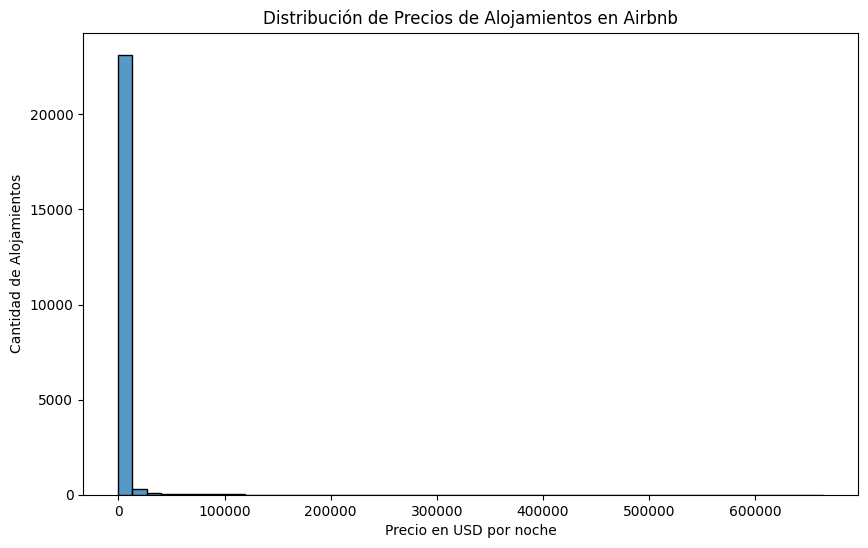

In [14]:
plt.figure(figsize=(10,6))
sns.histplot(price_numerico, bins=50)
plt.title("Distribución de Precios de Alojamientos en Airbnb")
plt.xlabel("Precio en USD por noche")
plt.ylabel("Cantidad de Alojamientos")
plt.show()

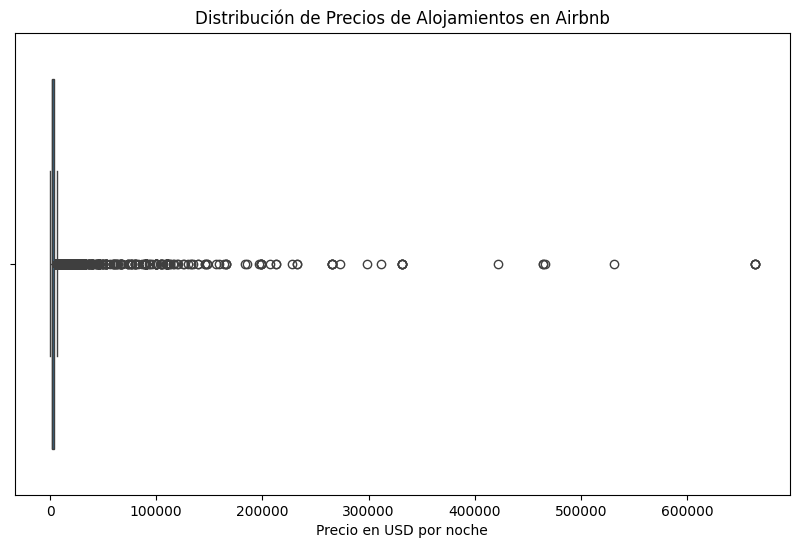

In [15]:
plt.figure(figsize=(10,6))
sns.boxplot(x=price_numerico)
plt.title("Distribución de Precios de Alojamientos en Airbnb")
plt.xlabel("Precio en USD por noche")
plt.show()

### 2.3 Analisis exploratorio de outliers en la variable price


In [16]:
price_numerico.quantile([0.25, 0.5, 0.75, 0.9, 0.95, 0.99])

0.25     1394.00
0.50     2124.00
0.75     3319.00
0.90     5709.00
0.95     7966.00
0.99    30442.04
Name: price, dtype: float64

In [17]:
(price_numerico > 5000).sum(), price_numerico.shape[0]

(np.int64(2953), 23729)

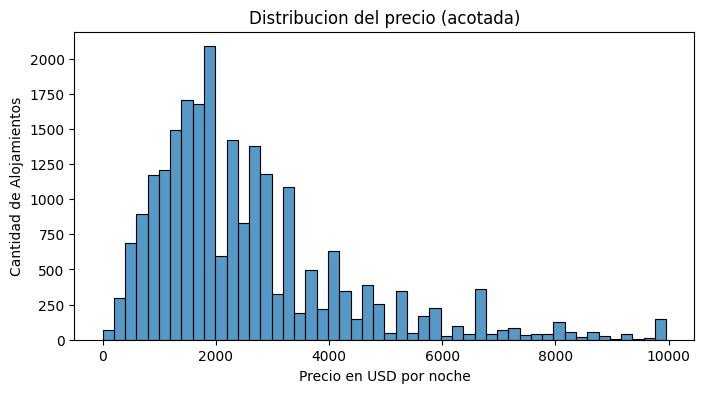

In [18]:
plt.figure(figsize=(8, 4))
sns.histplot(price_numerico[price_numerico < 10000], bins=50)
plt.title("Distribucion del precio (acotada)")
plt.xlabel("Precio en USD por noche")
plt.ylabel("Cantidad de Alojamientos")
plt.show()


### 2.4 Relacion del precio con algunas variables numericas

In [32]:
cols_numericas = ['accommodates', 'bathrooms', 'bedrooms', 'number_of_reviews', 'reviews_per_month']

df_numericas = df_listings[cols_numericas].copy()

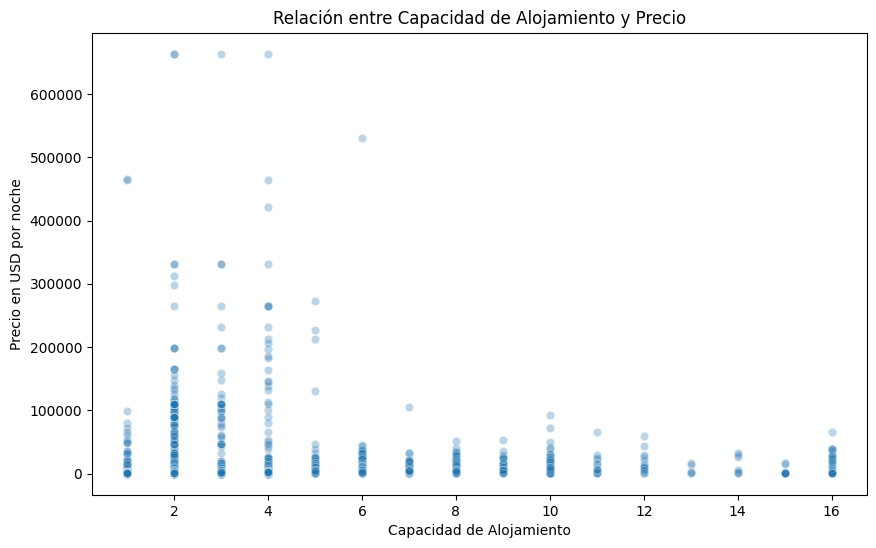

In [33]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df_numericas, x='accommodates', y=price_numerico, alpha=0.3)
plt.title("Relación entre Capacidad de Alojamiento y Precio")
plt.xlabel("Capacidad de Alojamiento")
plt.ylabel("Precio en USD por noche")
plt.show()

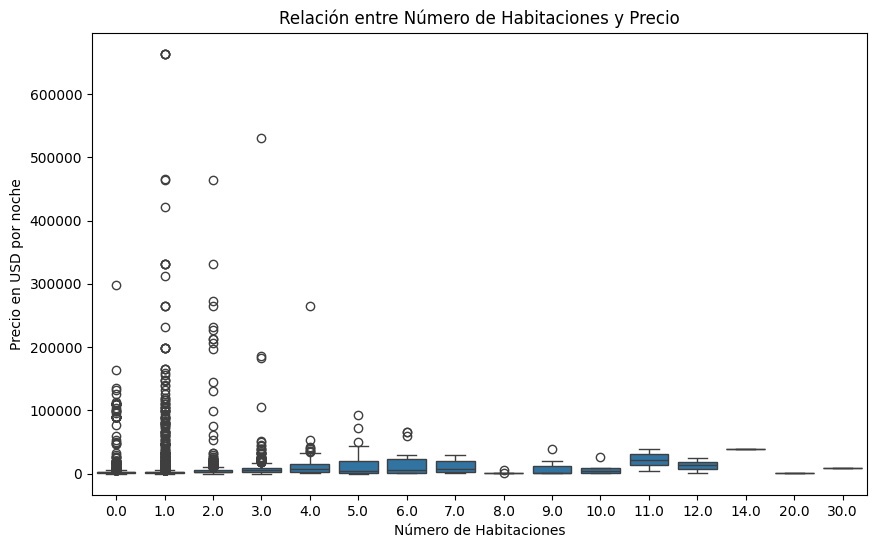

In [34]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df_numericas, x='bedrooms', y=price_numerico)
plt.title("Relación entre Número de Habitaciones y Precio")
plt.xlabel("Número de Habitaciones")
plt.ylabel("Precio en USD por noche")
plt.show()

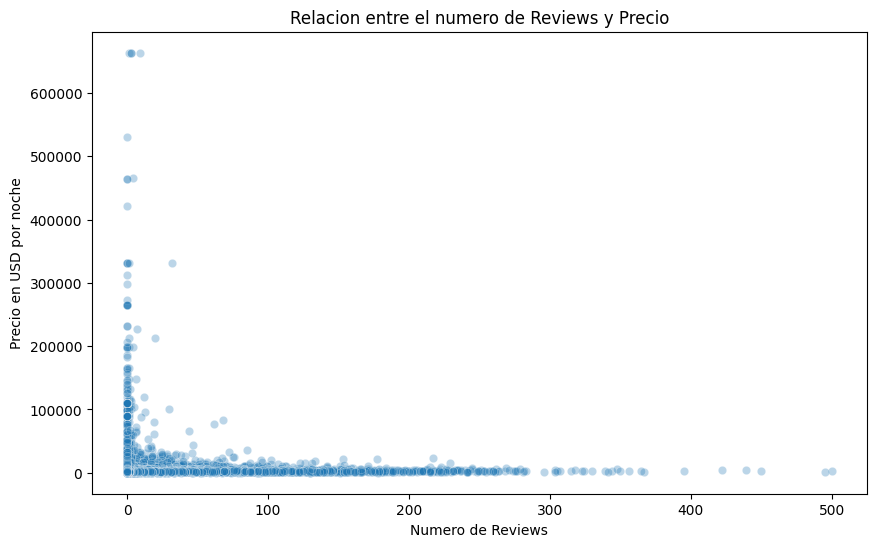

In [35]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df_numericas, x='number_of_reviews', y=price_numerico, alpha=0.3)
plt.title("Relacion entre el numero de Reviews y Precio")
plt.xlabel("Numero de Reviews")
plt.ylabel("Precio en USD por noche")
plt.show()

In [36]:
df_correlacion = df_numericas.copy()
df_correlacion['price'] = price_numerico

df_correlacion.corr()['price'].sort_values()

number_of_reviews   -0.029104
reviews_per_month   -0.011848
bedrooms             0.061189
bathrooms            0.064749
accommodates         0.091396
price                1.000000
Name: price, dtype: float64

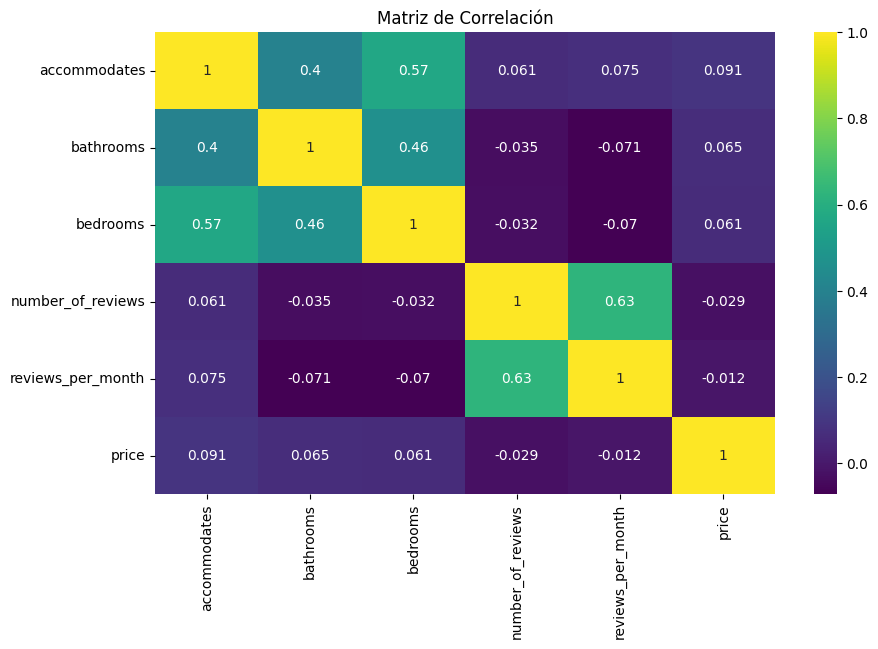

In [37]:
plt.figure(figsize=(10,6))
sns.heatmap(df_correlacion.corr(), annot=True, cmap='viridis')
plt.title("Matriz de Correlación")
plt.show()

Las variables numericas analizadas presentan correlaciones lineales bajas con el precio, lo que sugiere que el valor de una propiedad depende de múltiples factores combinados.


### 2.5 Relacion del precio con variables categoricas

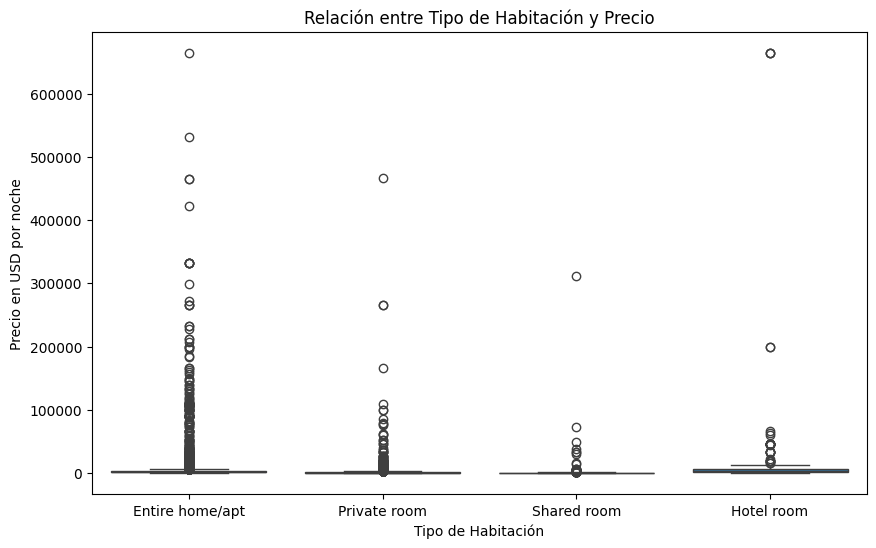

In [38]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df_listings, x='room_type', y=price_numerico)
plt.title("Relación entre Tipo de Habitación y Precio")
plt.xlabel("Tipo de Habitación")
plt.ylabel("Precio en USD por noche")
plt.show()

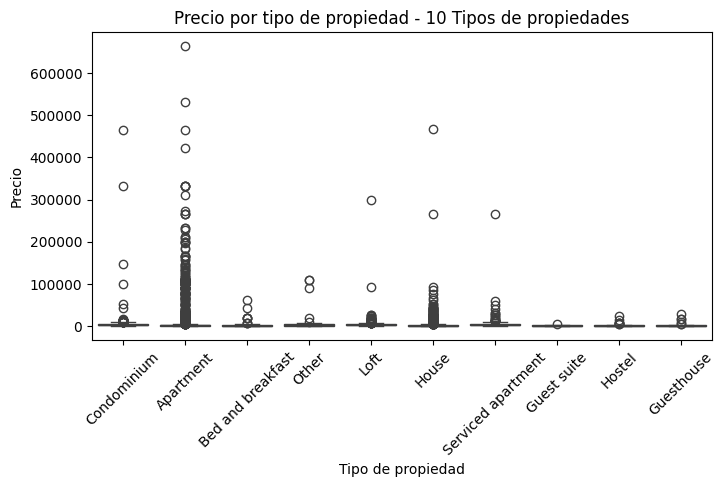

In [39]:
ten_property = df_listings["property_type"].value_counts().head(10).index

plt.figure(figsize=(8, 4))
sns.boxplot(
    x=df_listings[df_listings["property_type"].isin(ten_property)]["property_type"],
    y=price_numerico[df_listings["property_type"].isin(ten_property)]
)
plt.xticks(rotation=45)
plt.title("Precio por tipo de propiedad - 10 Tipos de propiedades")
plt.xlabel("Tipo de propiedad")
plt.ylabel("Precio")

plt.show()


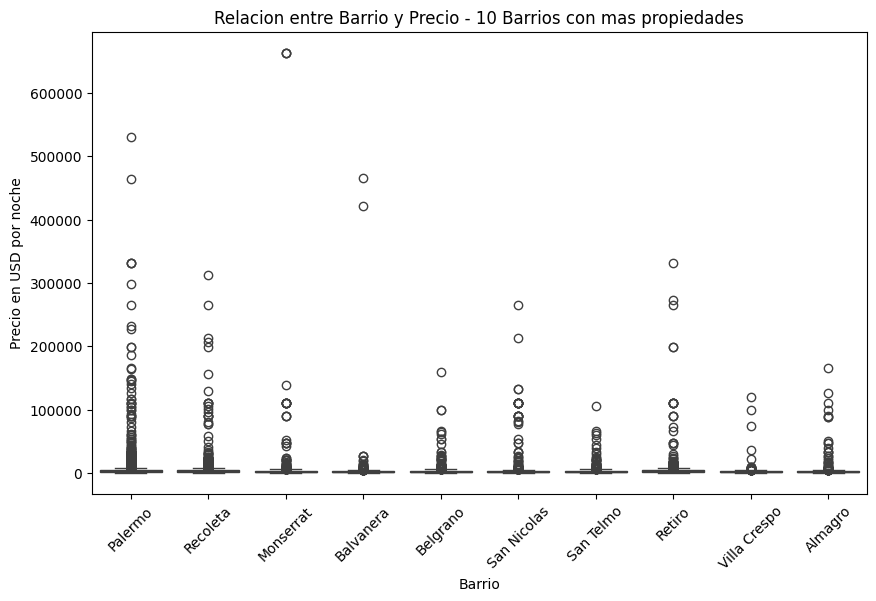

In [40]:
ten_neighbourhood = df_listings['neighbourhood_cleansed'].value_counts().head(10).index

plt.figure(figsize=(10,6))
sns.boxplot(
    x=df_listings[df_listings['neighbourhood_cleansed'].isin(ten_neighbourhood)]['neighbourhood_cleansed'], 
    y=price_numerico[df_listings['neighbourhood_cleansed'].isin(ten_neighbourhood)]
)   
plt.title("Relacion entre Barrio y Precio - 10 Barrios con mas propiedades")
plt.xlabel("Barrio")
plt.ylabel("Precio en USD por noche")
plt.xticks(rotation=45)
plt.show()

## 3. Conclusiones del analisis exploratorio

El analisis exploratorio muestra que la variable precio presenta una distribucion asimetrica con presencia de outliers,con una alta concentracion de valores en rangos bajos y pocos casos extremos.

Las variables numericas analizadas presentan correlaciones lineales debiles con el precio, mientras que las variables categoricas, en particular el tipo de habitacion y la ubicacion, muestran diferencias mas marcadas en los niveles de precio.

Asimismo, se identificaron aspectos de calidad de datos que requeriran tratamiento en la etapa de ETL, como el formato de la variable precio y la presencia de valores extremos.
